# Linear Regression Implementation - Mulltiple Features Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
# Generating synthetic data

In [3]:
X, y = make_regression(n_samples=500,
                       n_features=10,
                       n_informative=5,
                       noise=25.8,
                       random_state=0)

In [25]:
n_features = X.shape[1]
print(n_features)

10


In [4]:
print(X.shape, y.shape)

(500, 10) (500,)


In [5]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [6]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,1.706468,1.511639,-0.000417,0.374155,0.073285,0.701783,0.409552,-0.461894,-0.626490,-0.799593
1,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.098150,0.655264
2,0.093953,-0.130107,0.929505,0.582225,-2.739677,0.943046,-2.094603,-0.569312,0.269904,0.123722
3,-1.542758,-0.789954,0.537035,-0.286835,-2.369623,-0.767332,1.634406,-0.260560,0.128957,0.571227
4,-0.101003,-2.231538,0.436187,1.571463,1.324868,-0.587375,1.077315,0.840648,0.261106,0.811090


In [7]:
y.head()

,0
0,143.882506
1,61.998444
2,-24.021487
3,4.128657
4,63.147934


In [8]:
X.std(axis = 0)

0    0.984889
1    1.003099
2    0.994039
3    0.954577
4    1.019624
5    0.918999
6    0.993774
7    1.021318
8    0.970692
9    0.986354
dtype: float64

In [9]:
X - X.mean(axis = 0)

,0,1,2,3,4,5,6,7,8,9
0,1.736424,1.582916,0.093155,0.325706,0.105122,0.684157,0.418691,-0.470449,-0.689360,-0.750613
1,-1.587000,0.711408,-0.275609,-0.287828,-0.706195,-0.041952,1.108799,0.271370,-0.161020,0.704244
2,0.123909,-0.058831,1.023078,0.533775,-2.707841,0.925420,-2.085464,-0.577867,0.207035,0.172702
3,-1.512802,-0.718678,0.630607,-0.335284,-2.337787,-0.784958,1.643545,-0.269115,0.066087,0.620207
4,-0.071047,-2.160261,0.529760,1.523014,1.356705,-0.605001,1.086454,0.832093,0.198237,0.860070
...,...,...,...,...,...,...,...,...,...,...
495,-1.233217,-0.269416,-0.686732,0.222664,1.183570,-2.794985,1.054162,-0.597784,-0.511335,0.648020
496,-0.277176,-0.451302,0.115785,0.495004,0.522807,-0.466663,0.149128,0.856970,1.211175,-0.295066
497,-1.761372,-0.293779,-0.405444,-0.027098,-0.285707,-0.076212,-0.909974,-1.640978,-0.130004,0.241734
498,-0.330128,-1.055564,0.718020,0.006112,-0.638922,-0.367317,0.461539,-0.965135,0.535070,1.663776


In [10]:
def normalize(mat):
    mean = mat.mean(axis = 0)
    std = mat.std(axis = 0)
    
    return (mat - mean)/std

In [11]:
X_normalized = normalize(X)

In [12]:
X.mean(axis = 0)

0   -0.029956
1   -0.071276
2   -0.093573
3    0.048449
4   -0.031836
5    0.017626
6   -0.009139
7    0.008555
8    0.062870
9   -0.048980
dtype: float64

In [13]:
 X.std(axis = 0)

0    0.984889
1    1.003099
2    0.994039
3    0.954577
4    1.019624
5    0.918999
6    0.993774
7    1.021318
8    0.970692
9    0.986354
dtype: float64

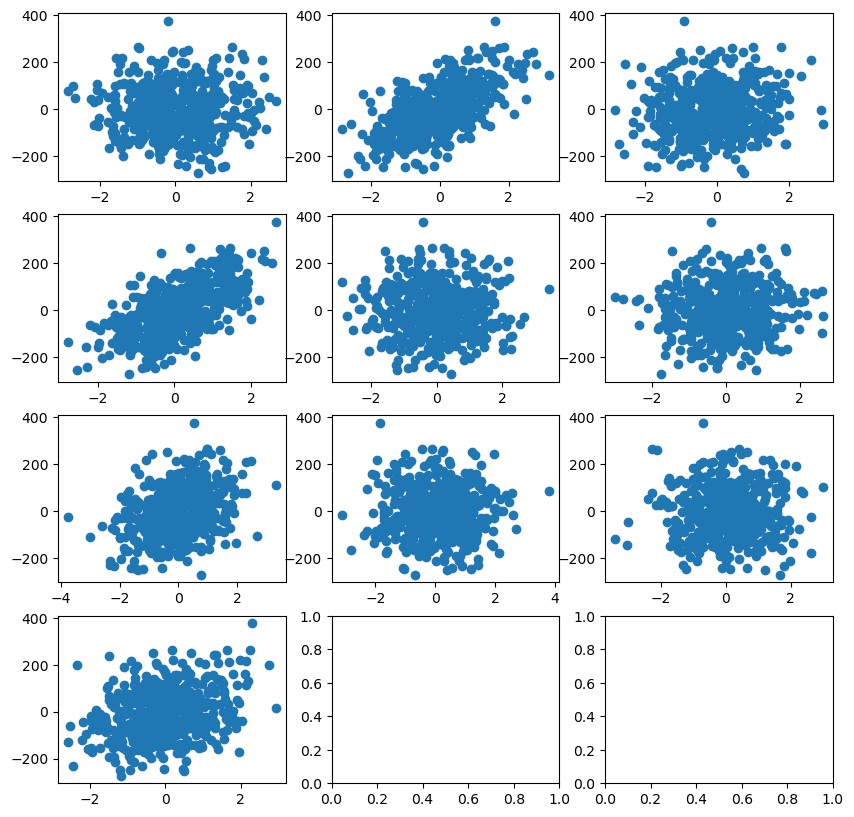

In [14]:
fig, axes = plt.subplots(4,3, figsize=(10,10))

col_counter = 0
for row in range(4):
    for col in range(3):
        if col_counter<=9:
            axes[row,col].scatter(X.iloc[:, col_counter], y)
        else:
            break
        col_counter+= 1

In [15]:
# Train Test Split

def train_test_split(X,y, train_percent = .7):
    
    X = np.array(X)
    y = np.array(y)
    
    data = np.concatenate((X,y), axis = 1)
    np.random.shuffle(data)
    
    split_rows = int(data.shape[0]*train_percent)
    
    X_train, y_train = data[:split_rows,:-1], data[:split_rows,-1]
    X_test, y_test = data[split_rows:,:-1], data[split_rows:,-1]
    
    return X_train, y_train, X_test, y_test
    

In [16]:
X.shape, y.shape

((500, 10), (500, 1))

In [17]:
X_train, y_train, X_test, y_test = train_test_split(X,y, train_percent=0.6)

In [18]:
X_train.shape, y_train.shape

((300, 10), (300,))

In [19]:
X_test.shape, y_test.shape

((200, 10), (200,))

In [20]:
# Model Building - Linear Regression

In [26]:
def preprocess(X):
    if X.shape[1] == n_features: 
        m = X.shape[0]
        ones = np.ones((m,1))
        X = np.hstack((ones,X))
    return X

In [33]:
X_train = preprocess(X_train)
X_test = preprocess(X_test)

In [34]:
X_train.shape, X_test.shape

((300, 11), (200, 11))

In [21]:
def hypothesis(X, theta):
    return np.dot(X,theta)

In [22]:
def loss(X,y,theta):
    y_pred = hypothesis(X, theta)
    mse = np.mean((y_pred - y)**2)
    return mse

In [35]:
def gradient(X,y,theta):
    y_pred = hypothesis(X,theta)
    grad = np.dot(X.T, (y_pred - y))
    m = X.shape[0]
    return grad/m

In [38]:
def train(X,y,learning_rate = 0.1, max_iterations = 100):
    n = X.shape[1]
    theta = np.random.randn(n)
    error_list = []
    for i in range(max_iterations):
        error = loss(X,y,theta)
        error_list.append(error)
        theta = theta - learning_rate*gradient(X,y,theta)
    plt.plot(error_list)
    return theta

[ 6.99622313e-01 -1.13582361e+00  5.98587306e+01  9.75127833e+00
  6.93412486e+01 -3.63205329e-04  4.54061020e-01  3.99920076e+01
 -7.38692164e-01  2.96750705e+00  2.29535784e+01]


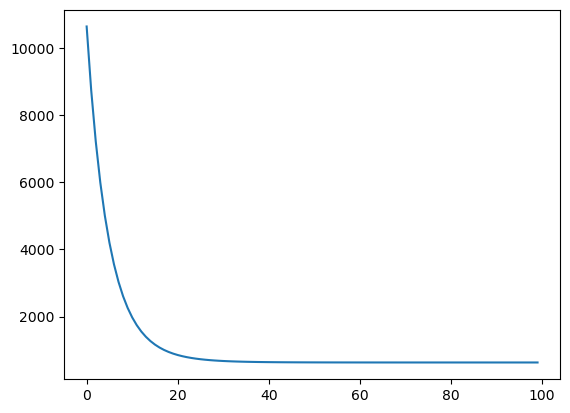

In [39]:
theta = train(X_train, y_train)
print(theta)

In [43]:
def r2_score(y,y_pred):
    y_mean = np.mean(y)
    numerator = np.sum((y-y_pred)**2)
    denominator = np.sum((y-y_mean)**2)
    
    return 1 - numerator/denominator
    
    

In [44]:
y_pred = hypothesis(X_test, theta)
print(r2_score(y_test,y_pred))

0.9332736933655614


In [ ]:
## Linear Regression using sklearn

In [52]:
from sklearn.linear_model import LinearRegression

In [46]:
linear_regression = LinearRegression()

In [47]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = linear_regression.predict(X_train)

In [51]:
linear_regression.score(X_test, y_test)

0.9333239210039387